In [1]:
#Regular EDA and Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear in the notebook
%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluators 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("heart-disease.csv.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

#There are 207 males and 96 females in our study

In [8]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


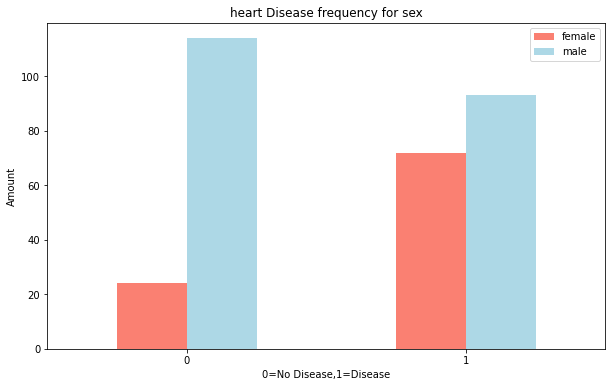

In [9]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"]);
#let's add some attributes to it
plt.title("heart Disease frequency for sex")
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["female","male"])
plt.xticks(rotation=0);

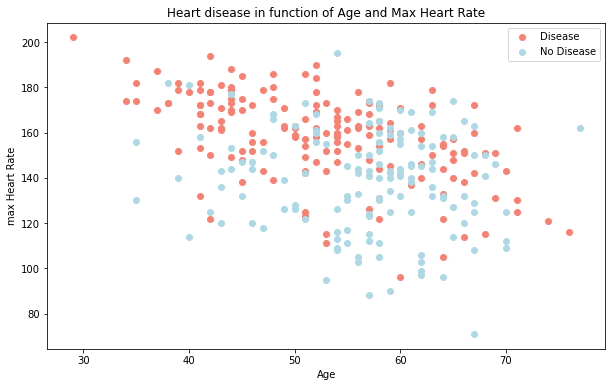

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("max Heart Rate")
plt.legend(["Disease","No Disease"])


## Correlation bw independent variables

In [11]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


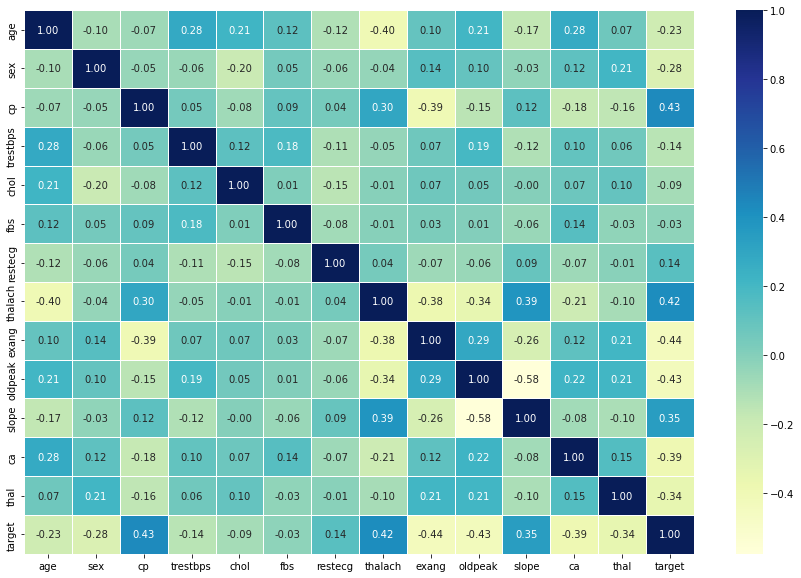

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

In [13]:
#splitting the data
X = df.drop("target",axis=1)

y = df["target"]

In [14]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

split the data into train and test

In [16]:
#split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
X_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2


## Model Choices

In [18]:
models = {"KNN" : KNeighborsClassifier(),
          "Logistic Regression" : LogisticRegression(),
          "Random Forest" : RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test) :
    """
    Fits and evaluates given machine learning models.
    """
    np.random.seed(42)
    
    model_scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores    
    

In [19]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Rishu Pal\Udemy\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6229508196721312,
 'Logistic Regression': 0.9016393442622951,
 'Random Forest': 0.8524590163934426}

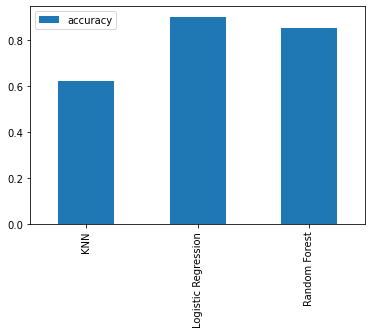

In [20]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

## As we can see here that KNN model does not perform well here but the other Two models performed very well.So we will go ahead with them.

## Tuning KNeighborsClassifier by hand

In [21]:
train_scores = []

test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))

In [22]:
train_scores

[1.0,
 0.7933884297520661,
 0.768595041322314,
 0.7768595041322314,
 0.756198347107438,
 0.7520661157024794,
 0.7066115702479339,
 0.7107438016528925,
 0.7272727272727273,
 0.7024793388429752,
 0.7024793388429752,
 0.7066115702479339,
 0.6859504132231405,
 0.6942148760330579,
 0.6900826446280992,
 0.6818181818181818,
 0.6983471074380165,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579]

In [23]:
test_scores

[0.6229508196721312,
 0.5409836065573771,
 0.5901639344262295,
 0.5901639344262295,
 0.6229508196721312,
 0.6721311475409836,
 0.7377049180327869,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327]

These are hard to understand,let's plot them.

Maximum KNN score on the test data: 73.77%


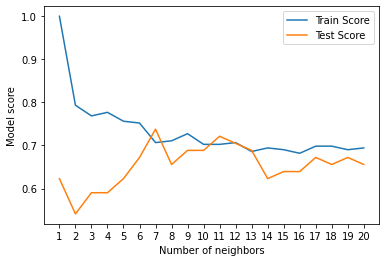

In [24]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.xticks(np.arange(1,21,1));
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Tuning other two models with RandomizedSearchCV

In [25]:
#different LogisticRegression Hyperparameters
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}

#different RandomForestClassifier Hyperparameters
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth" : [None,3,5,10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}

In [26]:
np.random.seed(42)

#setup random hyperparameter search for logisticRegeression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [28]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [29]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [30]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [31]:
rs_rf.score(X_test,y_test)

0.819672131147541

In [32]:
#different LogisticRegression Hyperparameters
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}

#different RandomForestClassifier Hyperparameters
rf_grid = {"n_estimators" : np.arange(500,1000,50),
           "max_depth" : [None,3,5,10],
           "min_samples_split" : np.arange(10,20,2),
           "min_samples_leaf" : np.arange(1,10,2)}

In [33]:
np.random.seed(42)

#setup random hyperparameter search for logisticRegeression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [34]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

# Evaluating a classification Model,beyond accuracy

In [35]:
#make prediction on test data
y_preds = gs_log_reg.predict(X_test)

In [36]:
y_preds

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

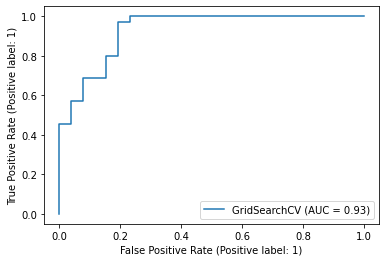

In [37]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gs_log_reg,X_test,y_test);

In [38]:
#Display confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[20  6]
 [ 1 34]]


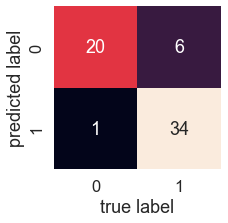

In [39]:
#import seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    plots a confusion matrix using seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds);    

In [40]:
# show Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.85      0.97      0.91        35

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [41]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [42]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [43]:
# cross-validated accuracy score
cv_acc = cross_val_score(clf,X,y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [44]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [45]:
# cross-validated precision score
cv_precision = cross_val_score(clf,X,y,
                         cv=5,
                         scoring="precision")

cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [46]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [47]:
# cross-validated recall score
cv_recall = cross_val_score(clf,X,y,
                         cv=5,
                         scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [48]:
# cross-validated F1 score
cv_F1 = cross_val_score(clf,X,y,
                         cv=5,
                         scoring="f1")

cv_F1 = np.mean(cv_F1)
cv_F1

0.8705403543192143

# Visualizing cross-validated metrices

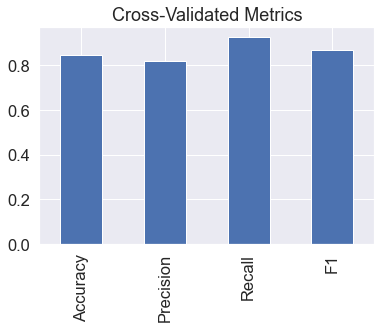

In [49]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_F1},index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Metrics",legend=False);

# Feature Importance

In [50]:
# fit an instance of LogisticRegression (taken from above)
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [51]:
clf.coef_

array([[ 0.01326775, -0.78048136,  0.61425731, -0.0157017 , -0.0031014 ,
        -0.03292103,  0.43181052,  0.02830777, -0.53538393, -0.44258958,
         0.38748819, -0.53453471, -0.80666917]])

In [52]:
# Match features to columns
features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.013267753191710216,
 'sex': -0.7804813618440912,
 'cp': 0.6142573087954445,
 'trestbps': -0.015701701087812738,
 'chol': -0.0031013987652757187,
 'fbs': -0.03292102741606017,
 'restecg': 0.4318105175267631,
 'thalach': 0.028307767241440046,
 'exang': -0.535383933902507,
 'oldpeak': -0.4425895805084792,
 'slope': 0.3874881915780325,
 'ca': -0.5345347050262863,
 'thal': -0.8066691656454558}

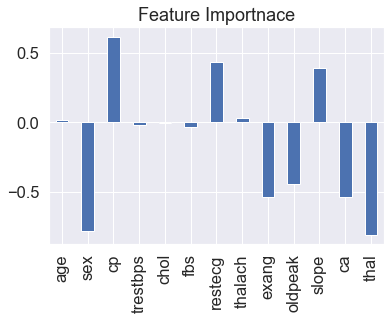

In [53]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict,index=[0])
features_df.T.plot.bar(title="Feature Importnace",legend=False);